In [1]:
import scipy.io as spio
import csv
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.set(style='darkgrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [16, 11]})
sns.set_context("talk")

def display_image_in_actual_size(im_path):
    # function from stackoverflow https://bit.ly/2WHnH6i
    
    dpi = 80
    im_data = plt.imread(im_path)
    height, width, depth = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

In [2]:
# Load mat file to array
mat = spio.loadmat(os.path.join('..', 'dataframe', 'mat_files', 'cars_train_annos.mat'), squeeze_me=True)
row_mat = mat['annotations']

mat_class = spio.loadmat(os.path.join('..', 'dataframe', 'mat_files', 'cars_meta.mat'), squeeze_me=True)
row_mat_class = mat_class['class_names']

In [3]:
data_array = []
class_dict = {}

# Map class id and name
for i, row in enumerate(row_mat_class):
    class_dict[i+1] = row
    
# Clean up data and store the width, height and class of each image
for row in row_mat:
    x1, y1, x2, y2, car_id, file_path = row
    data_array.append([file_path, abs(x2-x1), abs(y2-y1), int(car_id)])

# Convert to pandas dataframe
cars_df = pd.DataFrame(data_array, columns=['filepath', 'width', 'height', 'class'])

In [4]:
cars_df = cars_df.sort_values(by=['class'])

In [5]:
cars_df.head()

,filepath,width,height,class
6173,06174.jpg,299,178,1
5920,05921.jpg,796,470,1
3392,03393.jpg,1720,776,1
4543,04544.jpg,310,172,1
945,00946.jpg,393,178,1


In [6]:
cars_df.describe(exclude='O').transpose()

,count,mean,std,min,25%,50%,75%,max
width,8144.0,573.301817,375.675050,73.0,338.0,504.0,659.0,4156.0
height,8144.0,307.770383,213.463238,23.0,173.0,260.0,370.0,2648.0
class,8144.0,98.979371,56.503148,1.0,50.0,99.0,148.0,196.0


***

## Analysis of the number of images per class

### Zoom in at the lower count of images per class

(176, 196)

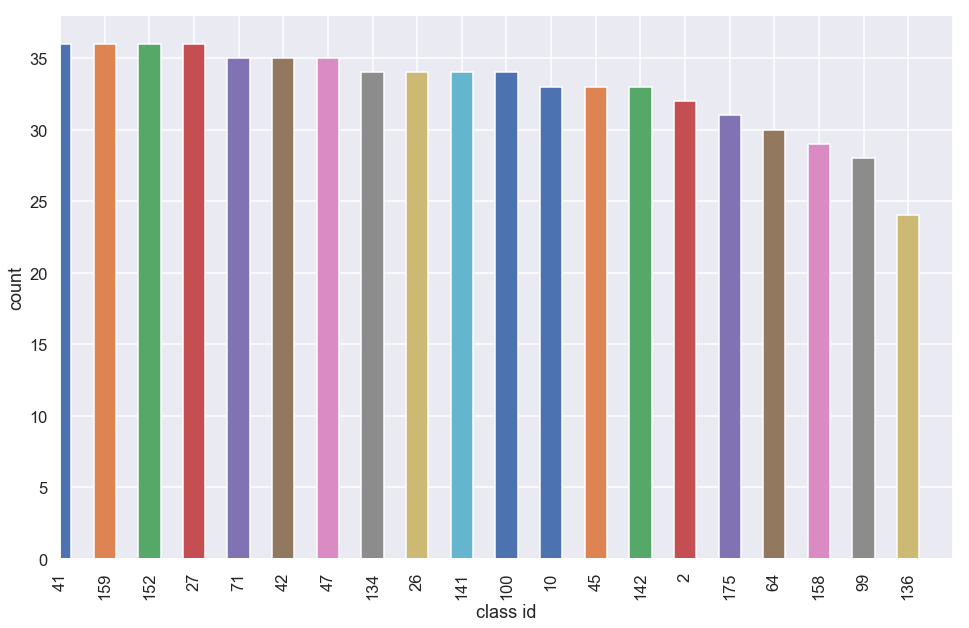

In [7]:
cars_df['class'].value_counts().plot('bar', figsize=(16,10))
plt.xlabel('class id')
plt.ylabel('count')
plt.ylim(0, 38)
plt.xlim(176,196)

### Zoom in at the higher count of images per class

(-1, 18)

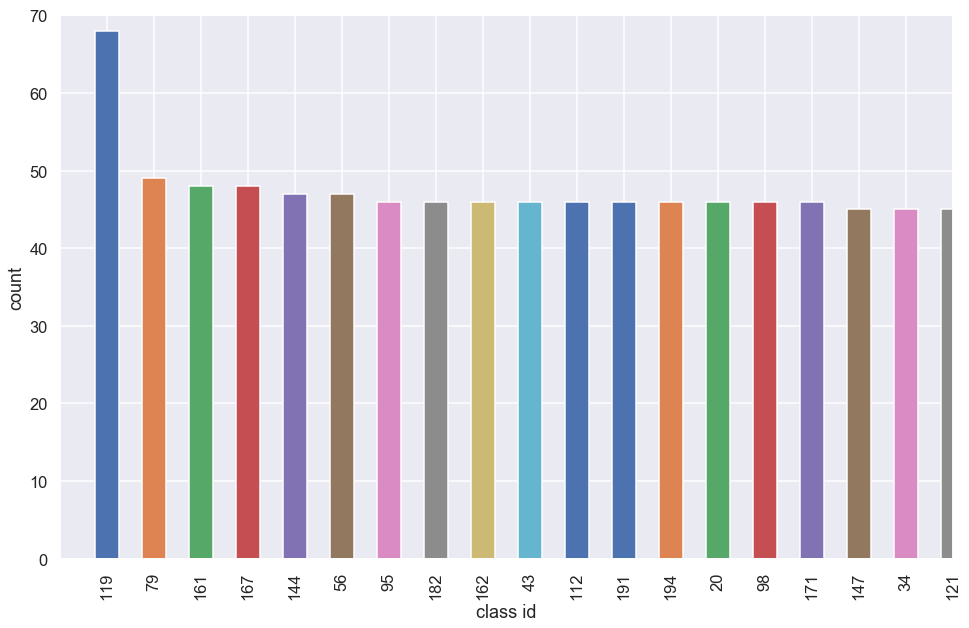

In [8]:
# Zoom in at the higher count of images per class
cars_df['class'].value_counts().plot('bar', figsize=(16,10))
plt.xlabel('class id')
plt.ylabel('count')
plt.ylim(0, 70)
plt.xlim(-1,18)

In [9]:
print("Lowest images count :", class_dict[136])
print("Highest images count :", class_dict[119])

Lowest images count : Hyundai Accent Sedan 2012
Highest images count : GMC Savana Van 2012


__We can see that there are one extreme class at both ends. The Hyundai Accent Sedan has the lowest sample of only 24 images while GMC Savana Van has very high sample of 68 images, which is about 3 times higher than Hyundai Accent Sedan__

***

## Analysis of the image size

### Distribution of image size in pixels

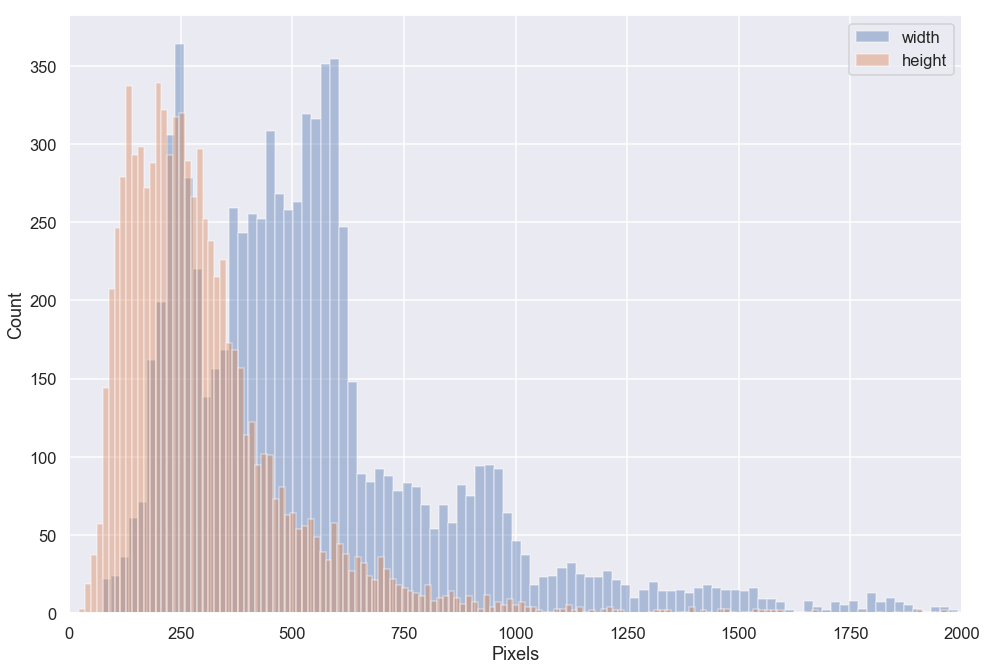

In [10]:
sns.set(style='darkgrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [16, 11]})
sns.set_context("talk")
sns.distplot(
    cars_df['width'], label='width', norm_hist=False, kde=False, bins=200, hist_kws={"alpha": 0.4}
).set(xlabel='Pixels', ylabel='Count');

sns.distplot(
    cars_df['height'], label='height', norm_hist=False, kde=False, bins=200, hist_kws={"alpha": 0.4}
).set(xlabel='Pixels', ylabel='Count');

plt.xlim(0, 2000)
plt.legend()

### Distribution ratio of width and height

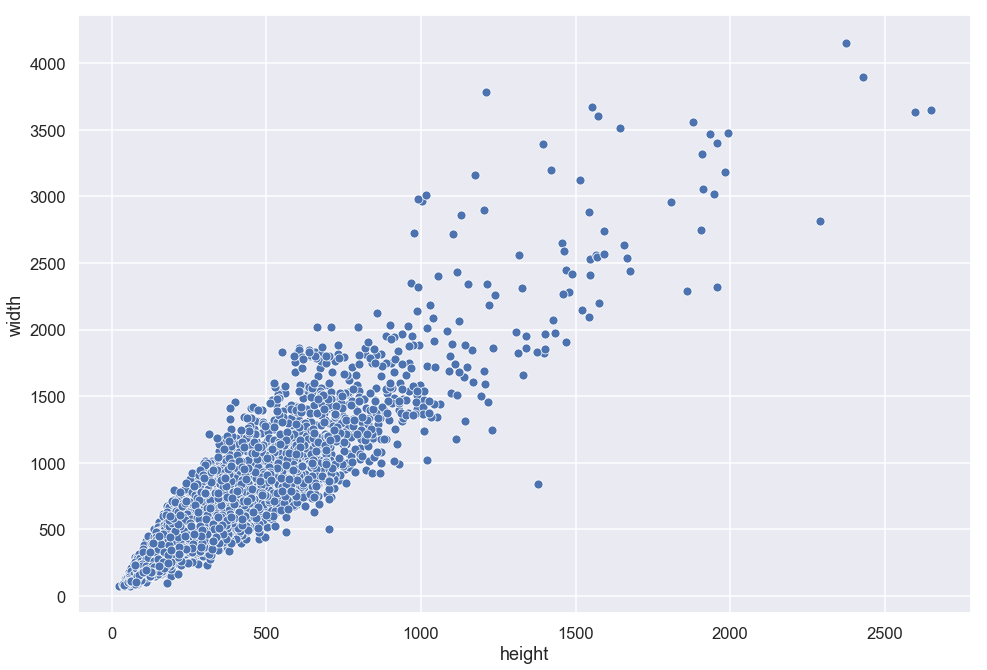

In [11]:
sns.scatterplot(x=cars_df['height'], y=cars_df['width']);

__The image size distribution looks normal, width size skewed more to the right shows that images are rectangle. The image ratio also looks normal regardless of the image size__

***

## Plotting the images

### Since small size images will affect the accuracy of the image classification, let analyze them

In [12]:
# Let see how many images has width less than 100 pixels
print(cars_df[cars_df['width'] < 100].count())

filepath    28
width       28
height      28
class       28
dtype: int64


In [13]:
# And see its image path so we can plot later
print(cars_df.loc[cars_df['width'] < 100])

       filepath  width  height  class
5803  05804.jpg     90      48      1
461   00462.jpg     78      50      1
5753  05754.jpg     92      79      1
521   00522.jpg     88      61      1
5656  05657.jpg     86      51      1
5223  05224.jpg     88      44      1
1608  01609.jpg     94      67     18
2291  02292.jpg     81      46     18
3434  03435.jpg     83      39     18
96    00097.jpg     73      43     57
2046  02047.jpg     93      40     57
6283  06284.jpg     76      23     57
7468  07469.jpg     73      39     57
4589  04590.jpg     98      47     62
1418  01419.jpg     99      60     70
1039  01040.jpg     77      58     88
5341  05342.jpg     92      84     88
7463  07464.jpg     94      57    107
2747  02748.jpg     97      85    119
2427  02428.jpg     87      57    123
1786  01787.jpg     87      42    123
6483  06484.jpg     91      36    123
7346  07347.jpg     80      37    123
4666  04667.jpg     88      50    123
4046  04047.jpg     88      35    123
8086  08087.

Sample of very small images in the dataset


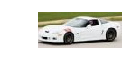

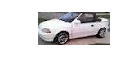

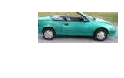

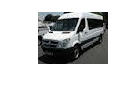

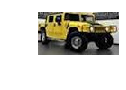

Reference images that has standard size input of DenseNet which is 224


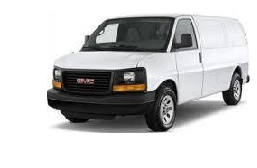

In [14]:
print("Sample of very small images in the dataset")
display_image_in_actual_size('../data/crop_images/train/02047.jpg')
display_image_in_actual_size('../data/crop_images/train/07347.jpg')
display_image_in_actual_size('../data/crop_images/train/04047.jpg')
display_image_in_actual_size('../data/crop_images/train/01040.jpg')
display_image_in_actual_size('../data/crop_images/train/05804.jpg')

print("Reference images that has standard size input of DenseNet which is 224")
display_image_in_actual_size('../data/crop_images/train/06626.jpg')

- As we can see, the images with less than 100 pixels width are very small. Even as a human, we can hardly identify the make and model of the cars except vehicle that have unique shape such as Hummer, Supercars
- This can lead to bad generalization of the prediction of the model
- But the small images count is very small compared to the whole dataset, which is less than 0.3%
- To further improve accuracy in the future, we can replace these small size images with the standard model size image (usually 224 x 224)